In [2]:
from rdkit import Chem
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as ptl
import seaborn as sns
import sys, os
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.Chem.QED import properties

import subprocess
import threading
import queue
import os
sys.path.append("../module/")
from lipinski import atualiza_data_frame_com_lipinski

In [3]:
smiles = 'Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1'

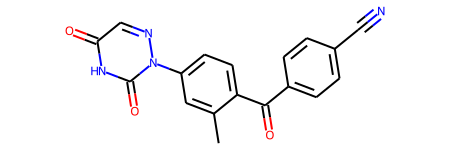

In [4]:
Chem.MolFromSmiles(smiles)

array(['molregno', 'mw_freebase', 'alogp', 'hba', 'hbd', 'psa', 'rtb',
       'ro3_pass', 'num_ro5_violations', 'cx_most_apka', 'cx_most_bpka',
       'cx_logp', 'cx_logd', 'molecular_species', 'full_mwt',
       'aromatic_rings', 'heavy_atoms', 'qed_weighted', 'mw_monoisotopic',
       'full_molformula', 'hba_lipinski', 'hbd_lipinski',
       'num_lipinski_ro5_violations', 'chembl_id', 'canonical_smiles'],
      dtype=object)

In [5]:
con = sqlite3.connect('dados_teste.db')

In [6]:
dataframe = pd.read_sql('select * from dados_teste',con)

In [7]:
dataframe.loc[dataframe.isnull().any(axis=1)].sort_values(by='psa')

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL4646183,1471.76,None,None,None,None,None,None,None,None,1471.76,None,None,None,1470.7470,None,None,None,CCN(CC)c1ccc2c(-c3ccccc3C(=O)N(C)CCCC(=O)N[C@H...
1,CHEMBL4646225,410.24,None,None,None,None,None,None,None,None,410.24,None,None,None,410.0414,None,None,None,COc1ccc2c(c1C(=O)OCOC(C)=O)OB(O)[C@@H](Sc1nncs...
2,CHEMBL4646292,390.73,None,None,None,None,None,None,None,None,390.73,None,None,None,390.9878,None,None,None,CCOC(=O)c1cc([Se]c2ccccc2)c2cc(Cl)ccc2n1
3,CHEMBL4646304,1064.42,None,None,None,None,None,None,None,None,1064.42,None,None,None,1063.7369,None,None,None,CCCCCCCC[C@H](NC(=O)C(C)(C)NC(=O)C(C)(C)NC(=O)...
4,CHEMBL4646351,1116.54,None,None,None,None,None,None,None,None,1116.54,None,None,None,1115.8046,None,None,None,CCCCCCCC[C@H](NC(=O)C(C)(C)NC(=O)C(C)(C)NC(=O)...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CHEMBL4651129,1021.31,None,None,None,None,None,None,None,None,1021.31,None,None,None,1020.5749,None,None,None,CC[C@H]1CCC[C@H](O[C@H]2CC[C@H](N(C)CCC[P+](c3...
296,CHEMBL4651132,1109.47,None,None,None,None,None,None,None,None,1109.47,None,None,None,1108.5377,None,None,None,CC1(C)C(/C=C/C=C/C=C2\N(CCCCCC(=O)NCCCCCCNc3c(...
297,CHEMBL4651138,3284.93,None,None,None,None,None,None,None,None,3284.93,None,None,None,3282.8190,None,None,None,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...
298,CHEMBL4651250,556.38,None,None,None,None,None,None,None,None,556.38,None,None,None,556.2055,None,None,None,COc1ccc([P+](CCC(=O)Nc2ccc3c(c2)B(O)OC3)(c2ccc...


In [8]:
ids_com_nan = dataframe.loc[dataframe.isnull().any(axis=1)][['chembl_id', 'canonical_smiles']]

In [9]:
ids_com_nan

,chembl_id,canonical_smiles
0,CHEMBL4646183,CCN(CC)c1ccc2c(-c3ccccc3C(=O)N(C)CCCC(=O)N[C@H...
1,CHEMBL4646225,COc1ccc2c(c1C(=O)OCOC(C)=O)OB(O)[C@@H](Sc1nncs...
2,CHEMBL4646292,CCOC(=O)c1cc([Se]c2ccccc2)c2cc(Cl)ccc2n1
3,CHEMBL4646304,CCCCCCCC[C@H](NC(=O)C(C)(C)NC(=O)C(C)(C)NC(=O)...
4,CHEMBL4646351,CCCCCCCC[C@H](NC(=O)C(C)(C)NC(=O)C(C)(C)NC(=O)...
...,...,...
295,CHEMBL4651129,CC[C@H]1CCC[C@H](O[C@H]2CC[C@H](N(C)CCC[P+](c3...
296,CHEMBL4651132,CC1(C)C(/C=C/C=C/C=C2\N(CCCCCC(=O)NCCCCCCNc3c(...
297,CHEMBL4651138,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...
298,CHEMBL4651250,COc1ccc([P+](CCC(=O)Nc2ccc3c(c2)B(O)OC3)(c2ccc...


In [ ]:
atualiza_data_frame_com_lipinski(ids_com_nan, dataframe, 20)

In [ ]:
dataframe